In [41]:
import csv
import pandas as pd

# Open and read the fake news CSV files
fake_file_path = 'articles\\fake_news.csv'
real_file_path = 'articles\\real_news.csv'

fake_label = 0
real_label = 1

def read_articles(file_path, label):
    df = pd.read_csv(file_path)

    # Check for any empty values in any column
    empty_rows = df[df.isnull().any(axis=1)]

    # Display rows with empty values

    if len(empty_rows)>0:
     print(empty_rows)

    # Drop rows with missing values in any column
    df.dropna(inplace=True)

    labeled_articles = []
    for index, row in df.iterrows():
        title, text, subject, date = row[['title', 'text', 'subject', 'date']]
        article = (title, text, subject, date, label)
        labeled_articles.append(article)
    return labeled_articles

labeled_fake_articles = read_articles(fake_file_path, fake_label)
labeled_real_articles = read_articles(real_file_path, real_label)

# labeled_fake_articles = []
# with open(fake_file_path, 'r', encoding='utf-8') as file:
#     csv_file = csv.reader(file)
#     headers = next(csv_file)
#     for row in csv_file:

#         title = row[0]
#         text = row[1]
#         subject = row[2]
#         date = row[3]
#         label = fake_label # Assign labels to each article (0 for fake)

#         article = (title, text, subject, date, label)

#         labeled_fake_articles.append(article)


# labeled_real_articles = []
# with open(real_file_path, 'r', encoding='utf-8') as file:
#     csv_file = csv.reader(file)
#     headers = next(csv_file)
#     for row in csv_file:

#         title = row[0]
#         text = row[1]
#         subject = row[2]
#         date = row[3]
#         label = real_label # Assign labels to each article (1 for real)

#         article = (title, text, subject, date, label)

#         labeled_real_articles.append(article)

combined_articles = labeled_real_articles + labeled_fake_articles

In [42]:
import random

random.shuffle(combined_articles)

# Display the first few rows of the combined dataset
for i in range(5):
    print(combined_articles[i])

# Check the distribution of labels
fake_count = sum(1 for article in combined_articles if article[4] == fake_label)
real_count = sum(1 for article in combined_articles if article[4] == real_label)
print("Fake Articles:", fake_count)
print("Real Articles:", real_count)

('White House wants to help states, cities offload infrastructure', 'WASHINGTON (Reuters) - U.S. President Donald Trump’s administration told state and local officials on Wednesday that it will use its infrastructure plan to create incentives for the private sector to finance or take over public entities like bridges, tunnels and highways.  Transportation Secretary Elaine Chao and White House budget director Mick Mulvaney told about 150 transportation officials at the White House the administration wants the private sector to play a bigger role in managing and financing public infrastructure. Mulvaney said the administration wants to give states and cities “incentives to move stuff you might own off of your books and into the private sector.” He said that would result in states and cities “getting more money to do new stuff.” The administration has said it wants to spend $200 billion on infrastructure over 10 years, an amount the administration hopes will encourage another $800 billion

In [43]:
import re

def preprocess(text):

    # Define a list of known abbreviations
    abbreviations = ["U.S.", "Dr.", "etc.", "e.g.", "i.e."]
    
   # Separate words that are joined together (e.g., leftNews)
    tokens = []
    for word in text.split():
       # Check if the word is an abbreviation
        found_abbreviation = False
        for abbr in abbreviations:
            if abbr in word:
                # Remove punctuation from the abbreviation
                abbr_without_punctuation = ''.join(char for char in abbr if char.isalnum())

                # Tokenize the text
                tokens.append(abbr_without_punctuation)

                found_abbreviation = True
                break
        
        if not found_abbreviation:
            # Pattern to handle abbreviations and words with punctuation
            tokens.extend(re.findall(r'[A-Z]{2,}(?:\.[A-Z]\.)?(?:[,.!?]|$)|[A-Z]?[a-z]+|[A-Z]+|[a-z]+(?=[A-Z])', word))
      
    # Remove stopwords
    stopwords = ["the", "and", "is", "it", "in", "to", "of", "an", "a"]
    tokens_without_stopwords = [word for word in tokens if word not in stopwords]
   
    # Join tokens back into a string and convert text to lowercase
    preprocessed_text = ' '.join(tokens_without_stopwords).lower()

    text_without_punctuation = re.sub(r'[^\w\s]', '', preprocessed_text)

    return text_without_punctuation


# Preprocess the title, text and subject data in combined_articles
preprocessed_articles = []
for article in combined_articles:
    title, text, subject, date, label = article
    preprocessed_title = preprocess(title)
    preprocessed_text = preprocess(text)
    preprocessed_subject = preprocess(subject)
    preprocessed_article = (preprocessed_title, preprocessed_text, preprocessed_subject, date, label)
    preprocessed_articles.append(preprocessed_article)

# Example of preprocessed article
print("Original Title:", combined_articles[0][0])
print("Original Text:", combined_articles[0][1])
print("Original Subject:", combined_articles[0][2])
print("Preprocessed Title:", preprocessed_articles[0][0])
print("Preprocessed Text:", preprocessed_articles[0][1])
print("Preprocessed Subject:", preprocessed_articles[0][2])


# # Example usage:
# text = r'''This is an example"...(sentence of left-news and leftNews, worldnews, U.S., and Dr., 3, 800, 2019, 21questions with punctuation, numbers and abbreviations like e.g. and i.e. with punctuation and stopwords!'''
# preprocessed_text = preprocess(text)
# print("Original Text:", text)
# print("Preprocessed Text:", preprocessed_text)

Original Title: White House wants to help states, cities offload infrastructure
Original Text: WASHINGTON (Reuters) - U.S. President Donald Trump’s administration told state and local officials on Wednesday that it will use its infrastructure plan to create incentives for the private sector to finance or take over public entities like bridges, tunnels and highways.  Transportation Secretary Elaine Chao and White House budget director Mick Mulvaney told about 150 transportation officials at the White House the administration wants the private sector to play a bigger role in managing and financing public infrastructure. Mulvaney said the administration wants to give states and cities “incentives to move stuff you might own off of your books and into the private sector.” He said that would result in states and cities “getting more money to do new stuff.” The administration has said it wants to spend $200 billion on infrastructure over 10 years, an amount the administration hopes will enco

In [44]:
# CSV file path
preprocessed_csv_file = 'preprocessed_articles.csv'

# Open the CSV file in write mode
with open(preprocessed_csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['preprocessed_title', 'preprocessed_text', 'preprocessed_subject', 'date', 'label'])
    
    # Write each preprocessed article to the CSV file
    for article in preprocessed_articles:
        csv_writer.writerow(article)

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from textblob import TextBlob

# Read the preprocessed CSV file
df_full = pd.read_csv(preprocessed_csv_file)

# Decide on the size of the subsample, say 10% of the data
sample_size = 1000

# Make sure to set a random state for reproducibility
df = df_full.sample(n=sample_size, random_state=42)

# # Check for any empty values in any column
# empty_rows = df[df.isnull().any(axis=1)]

# # Display rows with empty values
# if len(empty_rows)>0:
#     print(empty_rows)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Example function to analyze sentiment
def analyse_sentiment(text):
    blob = TextBlob(text)
    # Get polarity score (-1 to +1). < 0 indicates negative sentiment, > 0 indicates positive sentiment
    polarity = blob.sentiment.polarity
    # Classify sentiment based on polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each article's text and add sentiment features
df['sentiment'] = df['preprocessed_text'].apply(analyse_sentiment)

# Now 'df' contains a new column 'sentiment' indicating the sentiment (positive, negative, or neutral) of each article

# Columns to include as features
text = df['preprocessed_text'] 
title = df['preprocessed_title']  
subject = df['preprocessed_subject'] 
label = df['label'] 
sentiment = df['sentiment']

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize text data using TF-IDF with n-gram range
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=40000)  # Adjust max_features as needed, this includes unigrams and bigrams

# Vectorize each text feature separately
x_text = vectorizer.fit_transform(text)
x_title = vectorizer.fit_transform(title)
x_subject = vectorizer.fit_transform(subject)
x_sentiment = vectorizer.fit_transform(sentiment)

# Concatenate the resulting matrices
X = hstack([x_title, x_text, x_subject, x_sentiment])
#X = x_title
y = label  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

# Now, x_train, x_test contain the preprocessed and vectorized text data,
# and y_train, y_test contain the corresponding labels

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed

model = lr_model

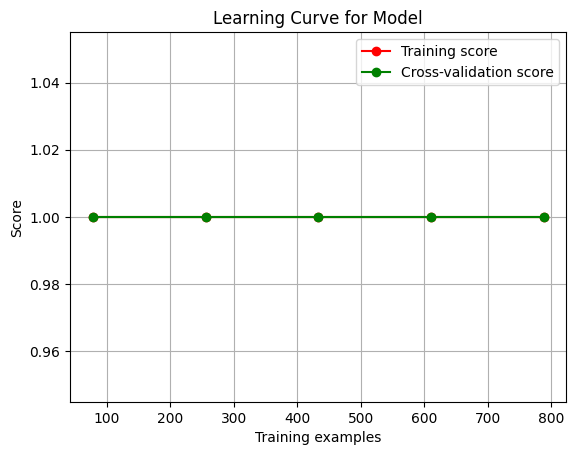

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(estimator = model, title = "Learning Curve for Model", X = X, y = y, cv = 5)
plt.show()

In [59]:
# Train the model
model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(x_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", val_report)

# Make predictions on the test set
y_test_pred = model.predict(x_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)

Validation Accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        76

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

Test Accuracy: 1.0
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       110

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

